In [1]:
# start importing data and such

In [2]:
import csv
from pathlib import Path
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import panel as pn
import matplotlib.pyplot as plt
import seaborn as sns
pn.extension('plotly')
%matplotlib inline
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Aseem Mangaokar\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import hvplot.pandas

In [4]:
#Reading the csv path and creating the dataframe for alcohol consumpton per state 1977-2018

alc_consumption_timeseries_csv = Path("Resources/apparent_per_capita_alcohol_consumption_1977_2018.csv")
alc_consumption_timeseries_df = pd.read_csv(alc_consumption_timeseries_csv, infer_datetime_format = True)

#Data cleansing - dropping null values and columns 

alc_consumption_timeseries_df.dropna(inplace = True)
alc_consumption_timeseries_df.drop(columns=['ethanol_beer_gallons_per_capita', 'ethanol_wine_gallons_per_capita', 'ethanol_spirit_gallons_per_capita'], inplace = True)
alc_consumption_timeseries_df.drop(columns=['ethanol_all_drinks_gallons_per_capita'], inplace = True)
alc_consumption_timeseries_df.head()


state  year  number_of_beers  number_of_glasses_wine  \
0  alabama  2018       246.518519               51.596899   
1  alabama  2017       253.629630               51.596899   
2  alabama  2016       258.370370               51.596899   
3  alabama  2015       263.111111               51.596899   
4  alabama  2014       267.851852               49.612403   

   number_of_shots_liquor  number_of_drinks_total  
0              143.260341              424.533333  
1              139.107867              424.533333  
2              134.955393              428.800000  
3              132.879157              428.800000  
4              128.726683              426.666667

In [5]:
#Selecting years 2000-2018 only
mask = (alc_consumption_timeseries_df['year'] >= 2000) & (alc_consumption_timeseries_df['year'] <= 2018)
alc_consumption_recent = alc_consumption_timeseries_df.loc[mask]
alc_consumption_recent.head()

state  year  number_of_beers  number_of_glasses_wine  \
0  alabama  2018       246.518519               51.596899   
1  alabama  2017       253.629630               51.596899   
2  alabama  2016       258.370370               51.596899   
3  alabama  2015       263.111111               51.596899   
4  alabama  2014       267.851852               49.612403   

   number_of_shots_liquor  number_of_drinks_total  
0              143.260341              424.533333  
1              139.107867              424.533333  
2              134.955393              428.800000  
3              132.879157              428.800000  
4              128.726683              426.666667

In [6]:
#Plotting alcohol consumption from 2000 to 2018 and grouping by the state

alc_consumption_recent.hvplot.line(
    'year',
    'number_of_drinks_total',
    xlabel= 'year',
    ylabel= 'number of drinks',
    groupby= 'state',
    title = "Total Number of Drinks per Capita by State, 2000-2018"
)

:DynamicMap   [state]
   :Curve   [year]   (number_of_drinks_total)

In [7]:
#Reading in the license fees per state (2018)
liquor_license_fees_csv = Path("Resources/liquor_license_fees_2018.csv")
liquor_license_fees = pd.read_csv(liquor_license_fees_csv)
liquor_license_fees.head()

#Dropping column
liquor_license_fees.drop( columns = ['Unnamed: 0'], inplace = True)
liquor_license_fees.head()

state liquor_license_fee other_fees duration
0        Wyoming            500.00           0   Annual
1      Wisconsin                  0          0        0
2  West Virginia            400.00           0   Annual
3     Washington            400.00           0   Annual
4       Virginia            300.00           0   Annual

In [8]:
liquor_license_fees['liquor_license_fee'] = liquor_license_fees['liquor_license_fee'].str.replace('$', '')
liquor_license_fees['other_fees'] = liquor_license_fees['other_fees'].str.replace('$', '')
liquor_license_fees.head()

state liquor_license_fee other_fees duration
0        Wyoming            500.00           0   Annual
1      Wisconsin                  0          0        0
2  West Virginia            400.00           0   Annual
3     Washington            400.00           0   Annual
4       Virginia            300.00           0   Annual

In [9]:
# Checking the dtypes
liquor_license_fees.dtypes

state                 object
liquor_license_fee    object
other_fees            object
duration              object
dtype: object

In [10]:
#Changing from object to float values

liquor_license_fees['liquor_license_fee'] = liquor_license_fees['liquor_license_fee'].str.replace(',','')
liquor_license_fees['other_fees'] = liquor_license_fees['other_fees'].str.replace(',','')


liquor_license_fees = liquor_license_fees.astype({"other_fees" : 'float64', "liquor_license_fee" : 'float64', "state":'str'})

liquor_license_fees.dtypes

state                  object
liquor_license_fee    float64
other_fees            float64
duration               object
dtype: object

In [11]:
#Plotting Fees by state for 2018 

fees_stacked = liquor_license_fees.hvplot.bar(x = 'state', 
                                          y = ['liquor_license_fee', 'other_fees'], 
                                          xlabel = 'state',
                                              ylabel = 'Fees',
                                          title = 'Liquor License Fees by State, 2018',
                                          height = 400,
                                              rot = 90,
                                              legend = False,
                                          width = 900,
                                             )

stacked_fees_plot = fees_stacked.opts(stacked=True) 

stacked_fees_plot

:Bars   [state,Variable]   (value)

In [12]:
#Reading in US unemployment data

unemployment_path = Path("Resources/USUnemployment.csv")
unemployment_df = pd.read_csv(unemployment_path, index_col = 'Year', infer_datetime_format = True)


#Data cleansing - Year Average column only

unemployment_df = unemployment_df['Year Average']

#Converting to a dataframe
unemployment_df.to_frame()

Year Average
Year              
2000      3.966667
2001      4.741667
2002      5.783333
2003      5.991667
2004      5.541667
2005      5.083333
2006      4.608333
2007      4.616667
2008      5.800000
2009      9.283333
2010      9.608333
2011      8.933333
2012      8.075000
2013      7.358333
2014      6.158333
2015      5.275000
2016      4.875000
2017      4.341667
2018      3.891667

In [13]:
#Plotting avg national unemployment rate 2000-2018 

unemployment_df.hvplot.line(
    'Year',
    'Year Average',
    xlabel= 'Year',
    ylabel = 'National Unemployment Rate',
    title = "Average National Unemployment Rate by Year, USA")

:Curve   [Year]   (Year Average)

In [14]:
#Creating plots to use in dashboard

alc_plot = alc_consumption_recent.hvplot.line(
    'year',
    'number_of_drinks_total',
    xlabel= 'year',
    ylabel= 'number of drinks',
    groupby= 'state',
    title = "Total Number of Drinks per Capita by State, 2000-2018",
    yaxis='left',
    shared_axes=False
)

unemployment_plot = unemployment_df.hvplot.line(
    'Year',
    'Year Average',
    xlabel= 'Year',
    ylabel = 'National Unemployment Rate',
    title = "Average National Unemployment Rate by Year, USA",
    yaxis='left',
    shared_axes=False)



In [15]:
#Creating panels of alcohol consumption plot and unemployment plot, panel of liquor license fee 

alc_unemployment_panel = pn.Column(alc_plot, unemployment_plot)

stacked_fees_panel = pn.Column(stacked_fees_plot)

In [16]:
stacked_fees_panel

Column
    [0] HoloViews(Bars)

In [17]:
alc_unemployment_panel

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='state', options=['alabama', 'alaska', ...], value='alabama', width=250)
            [1] VSpacer()
    [1] HoloViews(Curve)

In [18]:
#Creating new column to get the liquor fees.

liquor_license_fees['total_fees'] = liquor_license_fees['liquor_license_fee'] + liquor_license_fees['other_fees']


#Data Cleansing - creating new dataframe with only the total fees and sorting states A-Z and lowercase letters


ll_cleaned_2018 = liquor_license_fees[['state', 'total_fees']]
ll_cleaned_2018_df = ll_cleaned_2018.sort_values('state', ascending = True)
ll_cleaned_2018_df = ll_cleaned_2018_df.reset_index(drop = True)

ll_cleaned_2018_df["state"]= ll_cleaned_2018_df["state"].str.lower()

ll_cleaned_2018_df.head()

state  total_fees
0     alabama       300.0
1      alaska      1000.0
2     arizona      1000.0
3    arkansas       300.0
4  california     13900.0

In [19]:
ll_cleaned_2018_df.describe().to_csv('Resources/fees_summary_stats.csv')

In [20]:
#Recleansing of the alcohol dataframe to obtain 2018 data only

mask_2 = (alc_consumption_timeseries_df['year'] == 2018)

alc_consumption_2018 = alc_consumption_timeseries_df.loc[mask_2]

alc_consumption_2018.drop(columns=['year', 'number_of_beers', 'number_of_glasses_wine', 'number_of_shots_liquor'], inplace = True)


alc_consumption_2018.reset_index(inplace = True)
alc_consumption_2018.drop(columns = 'index', inplace = True)
alc_consumption_2018.tail()

state  number_of_drinks_total
51  northeast region              514.133333
52    midwest region              505.600000
53      south region              475.733333
54       west region              533.333333
55          us total              501.333333

In [21]:
#Cleansing to obtain data for 50 states only

alc_consumption_2018 = alc_consumption_2018.iloc[:51]
alc_consumption_2018.drop(index = [8], inplace = True)
alc_consumption_2018.reset_index(inplace = True, drop =True)
alc_consumption_2018.head()

state  number_of_drinks_total
0     alabama              424.533333
1      alaska              608.000000
2     arizona              480.000000
3    arkansas              379.733333
4  california              531.200000

In [22]:
#Combining of alc consumption for 2018 and liquor license fees
alc_consumption_fees_df = pd.concat([alc_consumption_2018, ll_cleaned_2018_df], join = 'inner', axis = 'columns')

#Dropping one of the state columns
alc_consumption_fees_df.columns = ['state', 'number_of_drinks_total', 'state_2', 'total_fees']

alc_consumption_fees_df.drop(alc_consumption_fees_df.columns[2], axis =1, inplace = True )
alc_consumption_fees_df.head()

state  number_of_drinks_total  total_fees
0     alabama              424.533333       300.0
1      alaska              608.000000      1000.0
2     arizona              480.000000      1000.0
3    arkansas              379.733333       300.0
4  california              531.200000     13900.0

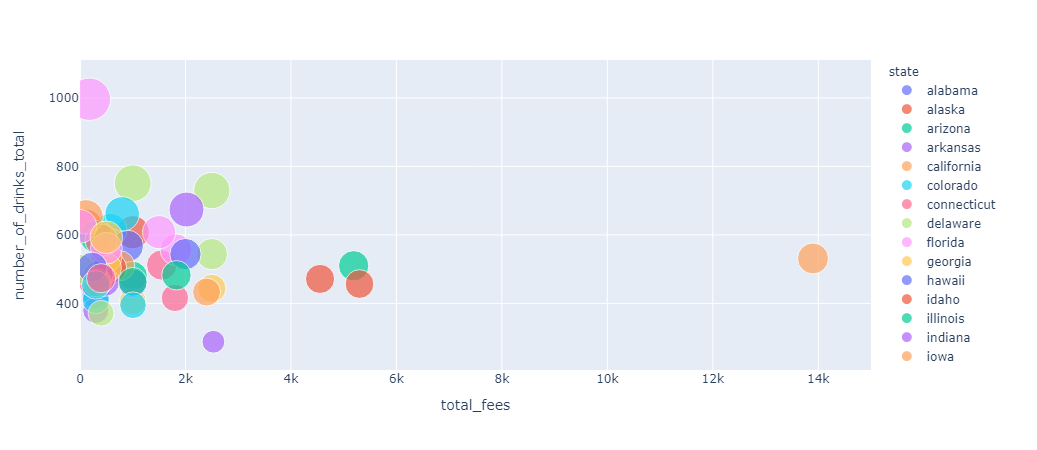

In [23]:
# Plotting bubble chart of the combined df to find corr between fees and alc consumption

fig = px.scatter(alc_consumption_fees_df, x="total_fees", y="number_of_drinks_total",
                 size="number_of_drinks_total", color="state",
                 range_x = [0,15000],
                 hover_name="state", log_x=False, size_max=30)
fig.show()

In [24]:
load_dotenv()

True

In [25]:
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# print(map_box_api)

In [26]:
#USING BeautifulSoup to scrape data from a table in a webpage

from bs4 import BeautifulSoup
import requests
url = 'https://www.latlong.net/category/states-236-14.html'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [27]:
table = soup.find_all('table')[0]

new_table = []

row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        value = column.get_text()
        new_table.append(value)
        column_marker += 1
df = pd.DataFrame(columns = ["Place Name", "Latitude", "Longitude"], index = range(0, 50))
value = 0
for x in range(0, 50):
    for y in range(0, 3):
        df.iloc[x, y] = new_table[value]
        value += 1
    x += 1

In [28]:
df.sort_values('Place Name', inplace = True)
df.reset_index(drop = True, inplace = True)
df["Latitude"] = df["Latitude"].astype(float)
df["Longitude"] = df["Longitude"].astype(float)
df_consumption_combo = pd.concat([alc_consumption_2018, df], axis = "columns", join = "inner")

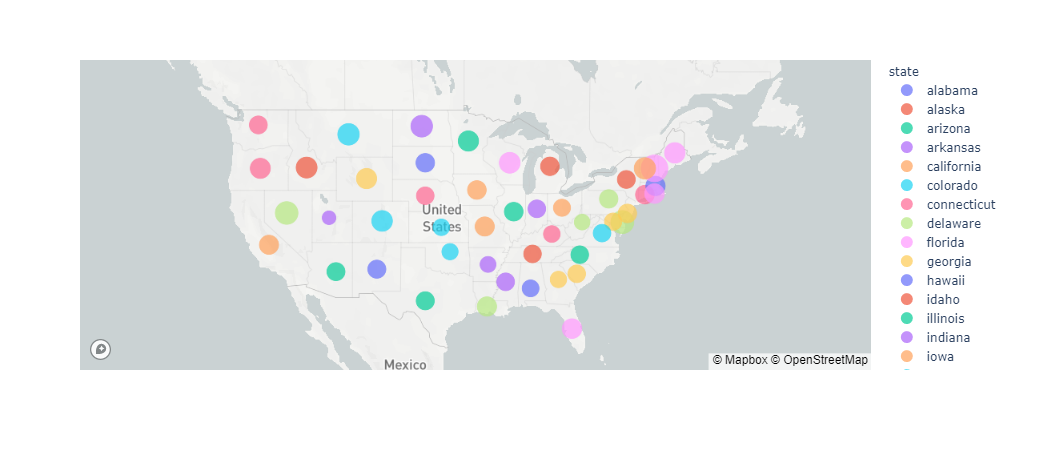

In [29]:
# Read in data
df_consumption_combo = df_consumption_combo[["state", "number_of_drinks_total", "Latitude", "Longitude"]]

# Plot Data
map = px.scatter_mapbox(
    df_consumption_combo,
    lat="Latitude",
    lon="Longitude",
    size="number_of_drinks_total",
    size_max = 20,
    color = "state",
    zoom=2.5
)
# Display the map
map.show()

In [30]:
# alc_consumption_recent.to_csv('Resources/consumption_for_mapbox_2.csv')

In [31]:
alc_consumption_recent.to_csv('Resources/consumption_2000_2018_state.csv')

In [32]:
#  EXCISE TAXES ON ALCOHOL TYPES PER GALLON VS CONSUMPTION BY GALLON

In [33]:
#Reading in and cleansing data of taxes and alc consumption
excise_consumption_csv = Path('Resources/excise_taxes_vs_alcohol_consumption.csv')
excise_consumption_df = pd.read_csv(excise_consumption_csv)
excise_consumption_df.fillna(value = 0, inplace = True)

excise_consumption_df.head()

state  beer_tax  wine_tax  spirits_tax  \
0     Alabama      1.05      0.00          0.0   
1      Alaska      1.07      2.50         12.8   
2     Arizona      0.16      0.84          3.0   
3    Arkansas      0.24      0.75          2.5   
4  California      0.20      0.20          3.3   

   ethanol_beer_gallons_per_capita  ethanol_wine_gallons_per_capita  \
0                             1.04                             0.26   
1                             1.06                             0.53   
2                             1.08                             0.39   
3                             0.90                             0.23   
4                             1.00                             0.62   

   ethanol_spirit_gallons_per_capita  
0                               0.69  
1                               1.25  
2                               0.79  
3                               0.64  
4                               0.87

In [34]:
# Creating separate data frames for beer,wine,spirits

beer_df = excise_consumption_df[['state', 'beer_tax', 'ethanol_beer_gallons_per_capita']]
wine_df = excise_consumption_df[['state', 'wine_tax', 'ethanol_wine_gallons_per_capita']]
spirits_df = excise_consumption_df[['state', 'spirits_tax', 'ethanol_spirit_gallons_per_capita']]

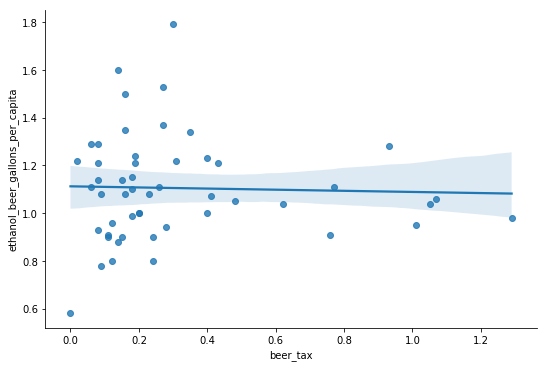

In [35]:
# Plotting correlation between beer consumption and tax levied on beer
beer_tax_plot = sns.lmplot(x='beer_tax', y='ethanol_beer_gallons_per_capita', data = beer_df, aspect=1.5, fit_reg = True)

beer_tax_plot.savefig("Resources/Images/beer_tax_correlation.png")

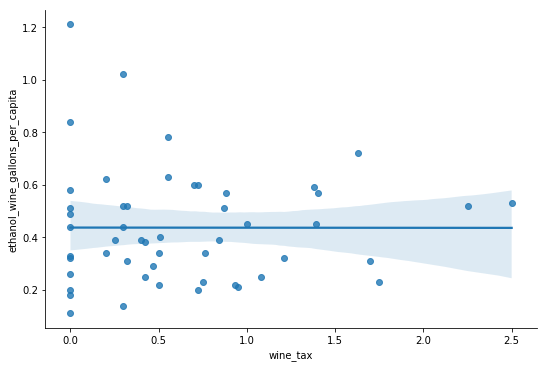

In [36]:
# Plotting correlation between wine consumption and tax levied on wine
wine_tax_plot = sns.lmplot(x='wine_tax', y='ethanol_wine_gallons_per_capita', data = wine_df, aspect=1.5, fit_reg = True)
wine_tax_plot.savefig("Resources/Images/wine_tax_correlation.png")

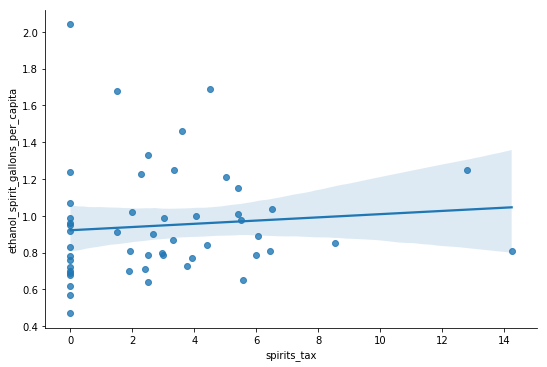

In [37]:
# Plotting correlation between spirit consumption and tax levied on spirits

spirits_tax_plot = sns.lmplot(x='spirits_tax', y='ethanol_spirit_gallons_per_capita', data = spirits_df, aspect=1.5, fit_reg = True)
spirits_tax_plot.savefig("Resources/Images/spirits_tax_correlation.png")

In [38]:
excise_consumption_df.describe().to_csv('Resources/summary_stats.csv')

In [39]:
# alc_unemployment_panel

In [40]:
pic_state_csv = Path('Resources/consumption_pic_2000_2018_state_2.csv')

pic_state_df = pd.read_csv(pic_state_csv)

pic_state_df.head()

state    year  number_of_drinks_total  personal_income
0  alabama  2000.0              401.066667          24338.0
1  alabama  2001.0              396.800000          25104.0
2  alabama  2002.0              409.600000          25712.0
3  alabama  2003.0              405.333333          26693.0
4  alabama  2004.0              407.466667          28415.0

In [41]:
pic_state_df['number_of_drinks_total'] = pic_state_df['number_of_drinks_total'] * 100

In [42]:
pic_state_df.head()

state    year  number_of_drinks_total  personal_income
0  alabama  2000.0             40106.66667          24338.0
1  alabama  2001.0             39680.00000          25104.0
2  alabama  2002.0             40960.00000          25712.0
3  alabama  2003.0             40533.33333          26693.0
4  alabama  2004.0             40746.66667          28415.0

In [43]:
pic_state_df.dtypes

state                      object
year                      float64
number_of_drinks_total    float64
personal_income           float64
dtype: object

In [44]:
pic_state_df = pic_state_df.astype({"state" : 'object', "year" : 'object', "number_of_drinks_total":'float64', 'personal_income':'float64'})

pic_state_df.head()

state  year  number_of_drinks_total  personal_income
0  alabama  2000             40106.66667          24338.0
1  alabama  2001             39680.00000          25104.0
2  alabama  2002             40960.00000          25712.0
3  alabama  2003             40533.33333          26693.0
4  alabama  2004             40746.66667          28415.0

In [45]:
pic_state_df.isnull().sum()

state                       1
year                        1
number_of_drinks_total      1
personal_income           115
dtype: int64

In [46]:
pic_state_df.dropna(inplace = True)

In [47]:
from panel.interact import interact
from panel import widgets
pn.extension()

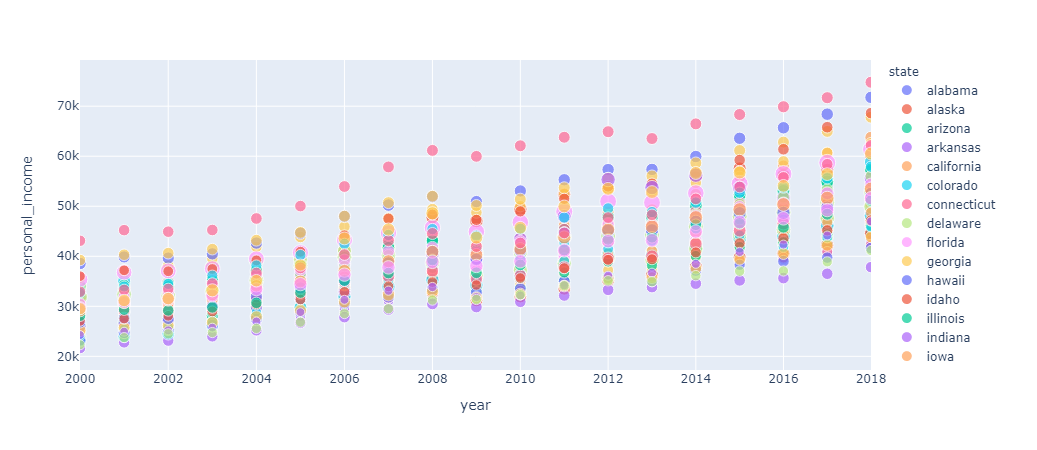

In [48]:
fig = px.scatter(pic_state_df, x="year", y="personal_income",
                 size="number_of_drinks_total", color="state",
                 range_x = [2000,2018],
                 hover_name="state", log_x=True, size_max=12)
fig.show()

In [49]:
cons_income_plot = pic_state_df.hvplot.line(
    'year',
    'personal_income',
    line_color = 'r',
    xlabel= 'year',
    ylabel= 'personal_income',
    groupby= 'state',
    title = "Personal Income per Capita vs Total Drinks Per Capita(x100) , 2000-2018",
    legend = True,
    shared_axes=False
)

In [50]:
alc_plot_2 = pic_state_df.hvplot.line(
    'year',
    'number_of_drinks_total',
    line_color = 'b',
    xlabel= 'year',
    ylabel= 'number of drinks',
    groupby= 'state',
    title = "Total Number of Drinks per Capita by State x 100, 2000-2018",
    legend = True
)

In [51]:
cons_income_composite = cons_income_plot * alc_plot_2

cons_income_composite

:DynamicMap   [state]
   :Overlay
      .Curve.I  :Curve   [year]   (personal_income)
      .Curve.II :Curve   [year]   (number_of_drinks_total)

In [52]:
#DASHBOARD CREATION

In [53]:
# Define Panel Visualization Functions
def map_consumption():
    map = px.scatter_mapbox(
    df_consumption_combo,
    lat="Latitude",
    lon="Longitude",
    size="number_of_drinks_total",
    size_max = 20,
    color = "state",
    zoom=2.5)
    
    map_pane = pn.panel(map)
    
    return map_pane

def alcohol_consumption_2000_2018():
    alc_2000_2018_pane = pn.panel(alc_plot)
    return alc_2000_2018_pane

def liquor_license_stacked():
    stacked_fees_pane = pn.panel(stacked_fees_plot)
    return stacked_fees_pane

def unemployment_nat_avg():
    unemployment_pane = pn.panel(unemployment_plot)
    return unemployment_pane

def alc_consumption_fees_2018():
    fig = px.scatter(alc_consumption_fees_df, x="total_fees", y="number_of_drinks_total",
                 size="number_of_drinks_total", color="state",
                 range_x = [0,15000],
                 hover_name="state", log_x=False, size_max=30)
    
    alc_fees_pane = pn.panel(fig)
    
    return alc_fees_pane

def beer_tax():
    beer_tax_plot = sns.lmplot(x='beer_tax', y='ethanol_beer_gallons_per_capita', data = beer_df, aspect=1.5, fit_reg = True)
    beer_tax_pane = pn.panel(beer_tax_plot) 
    return beer_tax_pane

def wine_tax():
    wine_tax_plot = sns.lmplot(x='wine_tax', y='ethanol_wine_gallons_per_capita', data = wine_df, aspect=1.5, fit_reg = True)
    wine_tax_pane = pn.panel(wine_tax_plot)
    return wine_tax_pane

def spirits_tax():
    spirits_tax_plot = sns.lmplot(x='spirits_tax', y='ethanol_spirit_gallons_per_capita', data = spirits_df, aspect=1.5, fit_reg = True)
    spirits_tax_pane = pn.panel(spirits_tax_plot)
    return spirits_tax_pane

def cons_income_comp():
    cons_income_pane = pn.panel(cons_income_composite)
    return cons_income_pane

# Create a Title for the Dashboard

title = pn.pane.Markdown(
    """
    # What effect(s) do states’ policies/regulations on alcohol have on alcohol consumption?""
    
    """,
    width = 600,
)


# Create a tab layout for the dashboard
# YOUR CODE HERE!

tabs = pn.Tabs(
    ('Welcome', pn.Column(title, map_consumption())),
    ('Liquor License Fees Per State 2018', pn.Column(liquor_license_stacked())),
    ('Alcohol Consumption and Fees Comparision', pn.Column(alc_consumption_fees_2018())),
    ('Unemployment National Yearly Average', pn.Column(alcohol_consumption_2000_2018(),unemployment_nat_avg())),
    ('Personal Income vs. Total Drinks per Year', pn.Column(cons_income_comp())))   
panel = pn.Column(title, tabs, width = 1200)



# Create the dashboard
# YOUR CODE HERE!
panel.servable()

Column(width=1200)
    [0] Markdown(str, width=600)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=600)
            [1] Plotly(Figure)
        [1] Column
            [0] HoloViews(Bars)
        [2] Column
            [0] Plotly(Figure)
        [3] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='state', options=['alabama', 'alaska', ...], value='alabama', width=250)
                    [1] VSpacer()
            [1] HoloViews(Curve)
        [4] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='state', options=['alabama', 'alaska', ...], value='alabama', width=250)
                    [1] VSpacer()

Column
    [0] Str(FacetGrid)
    [1] Str(FacetGrid)
    [2] Str(FacetGrid)

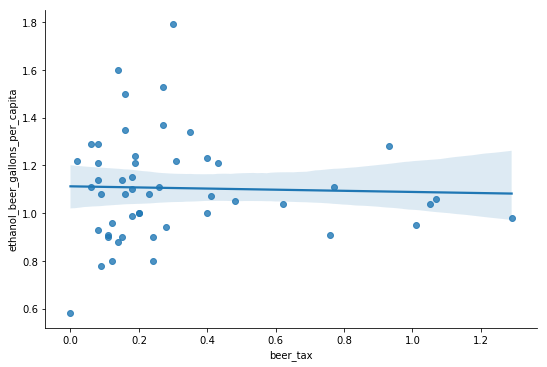

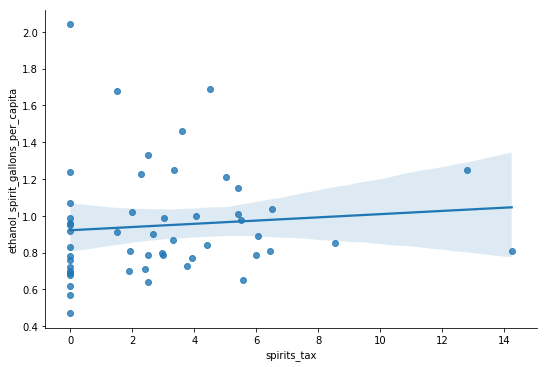

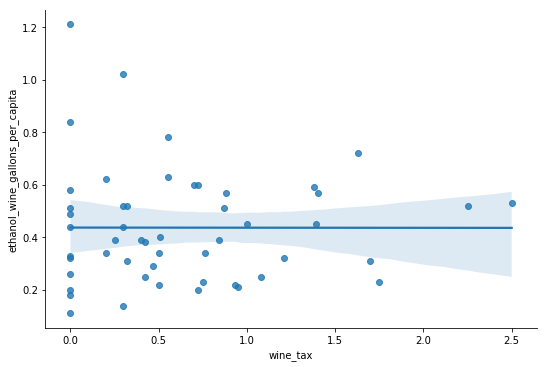

In [54]:
panel_2 = pn.Column(beer_tax(), spirits_tax(), wine_tax())
panel_2.servable()

In [55]:
# SUMMARY

# As the above summary statistics show, the standard deviations in taxes on all three types of alcohol products are greater than 
# the standard deviations in consumption of the same alcohol products.

# The summary statistics show that on average, people in the US consume most of their alcohol in the form of beer, 
# with spirits closely following in average yearly consumption per capita
# and wine consumption less than half the corresponding consumption of spirits

# Upon examination of the data visualizations provided (lmplots) , it is evident that the level of taxation on alcohol does not have a dramatic effect on the consumption of alcohol.
# Understandably, in places such as Utah, where the average attitude towards drinking can be perceived as conservative, consumption of alcohol varies significantly more from the mean.

# In almost every state, the 18-year period examined showed a gradual uptrend in per capita alcohol consumption, with consumption peaking for most states just before the most recent Recession born from the crash in the housing market.
# In the year following the housing market crash, as the unemployment rate rose across the United States, alcohol consumption decreased at a corresponding rate in most states. This can be attributed to lower levels of disposable income.
# As the economy recovered, the implied increase in disposable income per capita is reflected in the decrease in the unemployment rate, and a corresponding increase in the number of alcoholic drinks per year, per capita, in most states.

# NOTABLE OUTLIERS
#     Arizona, Georgia and South Carolina have both been in a drinking downtrend and a personal income uptrend across the time period

# In some states, such as Connecticut, Illinois and New York, alcohol consumption per capita did not decrease dramatically year-on-year, if at all, over the course of the same time span.
# 